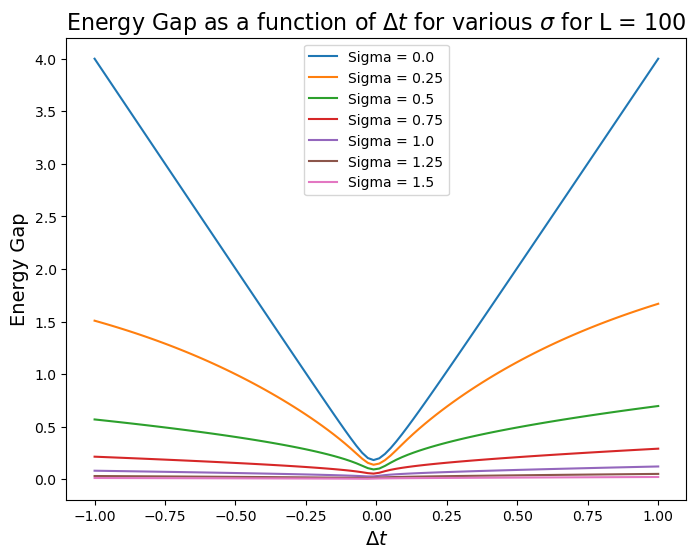

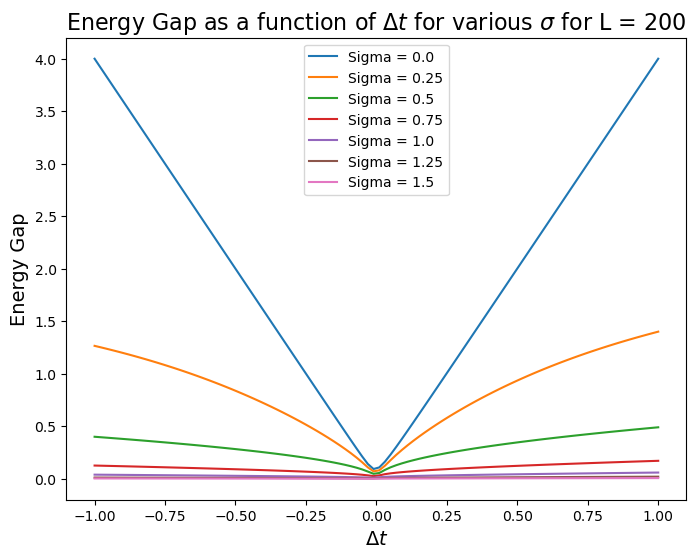

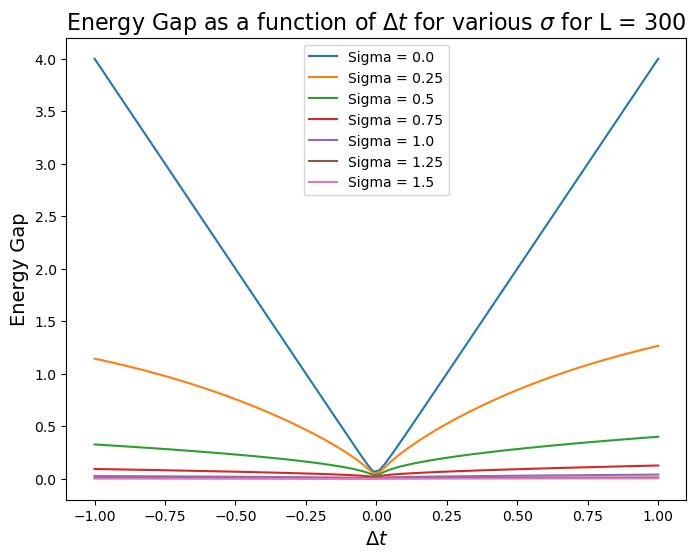

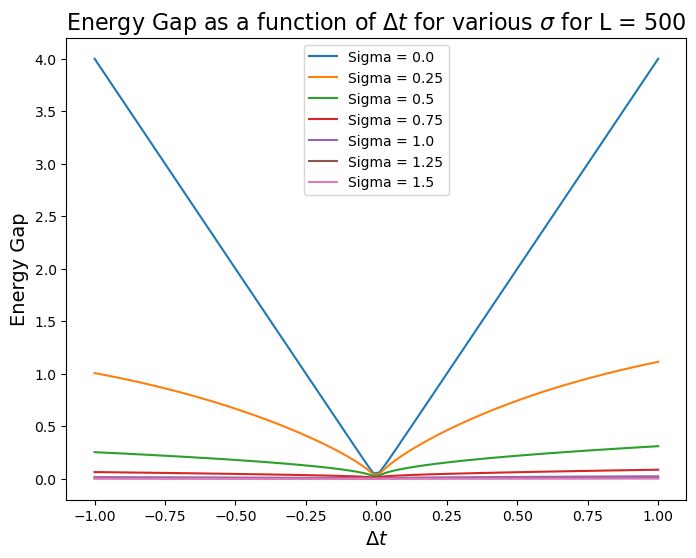

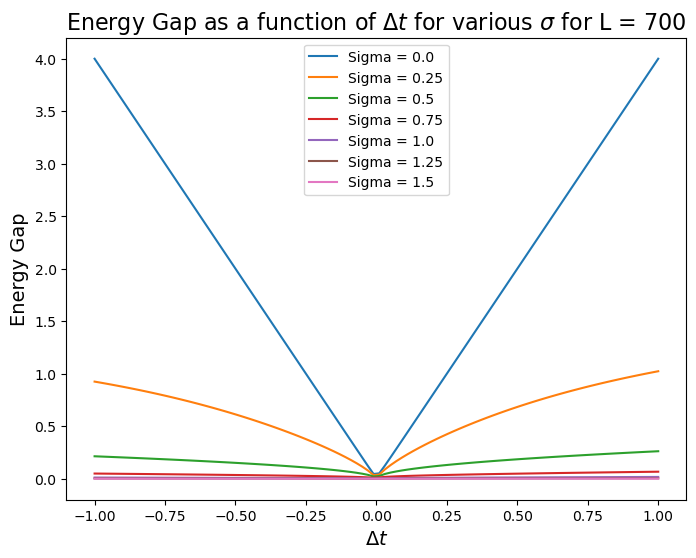

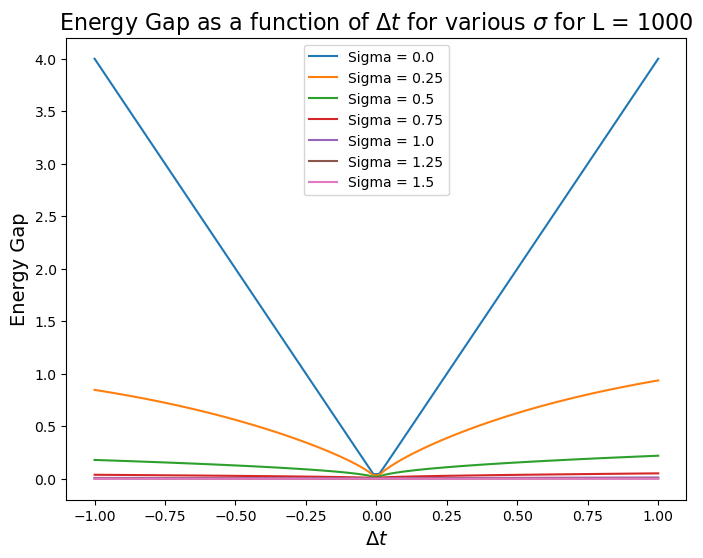

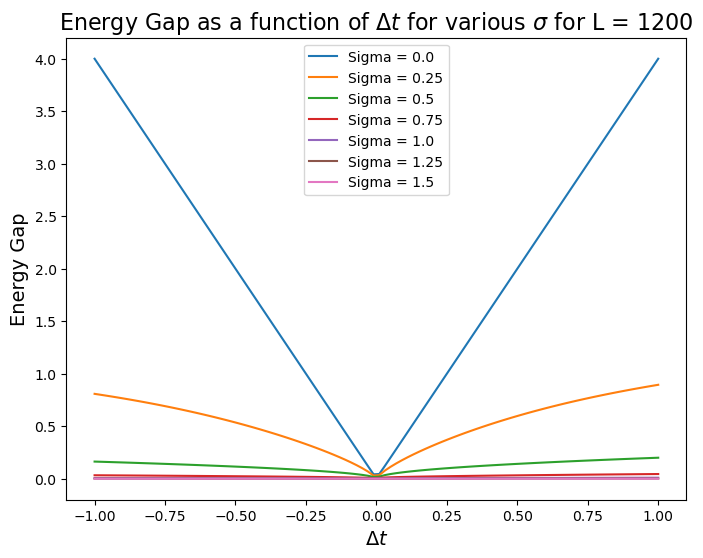

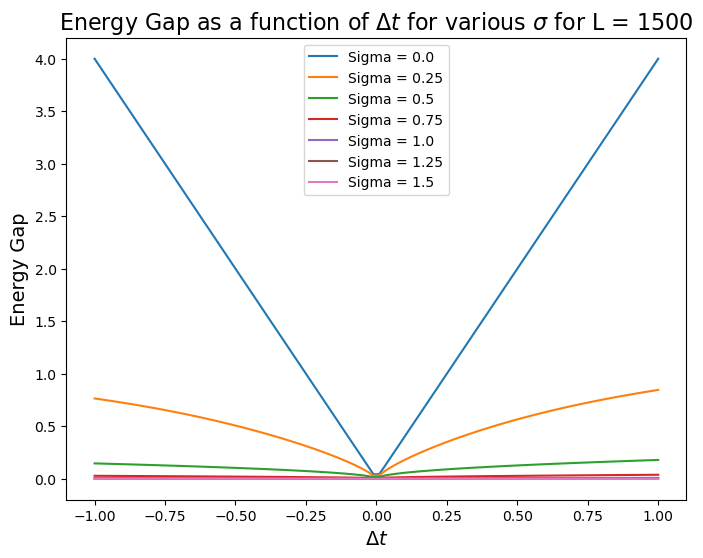

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#L= 1000
#t=1 #hopping amplitude
#dt=-0.2
#sigma=0#wrapping of space-time
#w=t-dt
#v=t+dt

# Function to create the real space SSH model Hamiltonian with N sites
def ssh_hamiltonian(L, v, w, sigma):
    SSH = np.zeros((L, L))
    for i in range (L-1):
            v_i = v * ((i + 1) /(L-1))**sigma
            w_i = w * ((i + 1) /(L-1))**sigma
            if i % 2 == 0:
              SSH[i+1,i]=v_i
              SSH[i,i+1]=v_i
            if i % 2 != 0:
             SSH[i+1,i]=w_i
             SSH[i,i+1]=w_i
    return SSH

# Function to calculate the energy gap for given delta_t
def compute_energy_gap_real_space(L, t, dt,sigma):
    v = t + dt
    w = t - dt
    mid_index = L // 2
    SSH = ssh_hamiltonian(L, v, w, sigma)
    # Compute the eigenvalues of the Hamiltonian
    #eigenvalues = np.linalg.eigvalsh(SSH)
    # Sort eigenvalues and compute the energy gap (difference between two lowest)
    eigenvalues, eigenvectors = np.linalg.eigh(SSH)
    #eigenvalues = np.sort(np.abs(eigenvalues))  # absolute for real space systems
    energy_gap = eigenvalues[mid_index+1] - eigenvalues[mid_index-2]  # gap between lowest two states
    return energy_gap

# Parameters
L= 1000  # Number of sites in the chain (must be even for SSH model)
t = 1.0  # Base hopping parameter
delta_t_values = np.linspace(-1, 1, 100)  # Range of dt values

#----------------------------------------------------------------------------
sigma_values = np.array([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5])
L_values = np.array([100, 200, 300, 500, 700, 1000, 1200, 1500])


# Loop over each L value
for L in L_values:
    plt.figure(figsize=(8, 6))  # Create a new figure for each L value
    
    # Plot the energy gap for each sigma in the same figure
    for sigma in sigma_values:
        energy_gaps = [compute_energy_gap_real_space(L, t, dt, sigma) for dt in delta_t_values]
        
        # Plot the energy gap as a function of delta_t for each sigma
        plt.plot(delta_t_values, energy_gaps, label=f'Sigma = {sigma}')
    
    #Add title, labels, and legend for each L plot
    # plt.title(f'Energy Gap vs Delta_t for L = {L}')
    # plt.xlabel('Delta_t')
    # plt.ylabel('Energy Gap')
    # plt.legend(title="Sigma Values")
    # plt.grid(True)
    
    # # Show the plot
    # plt.show()

    plt.xlabel(r'$\Delta t$', fontsize=14)
    plt.ylabel('Energy Gap', fontsize=14)
    plt.title('Energy Gap as a function of $\Delta t$ for various $\sigma$ for L = '+str(L), fontsize=16)
    #plt.grid(True)
    plt.legend()

    # Show the plot with all sigma values on the same graph
    plt.show()

#----------------------------------------------------------------------------

# sigma_values= np.array([0,0.25,0.5,0.75,1,1.25,1.5])
# L_values=np.array([100,200,300,5000,700,1000,1200,1500])
# for sigma in sigma_values:
#     energy_gaps = [compute_energy_gap_real_space(L, t, dt, sigma) for dt in delta_t_values]
    
#     # Plot the energy gap as a function of delta_t for each sigma
#     plt.plot(delta_t_values, energy_gaps, label=f'Sigma = {sigma}')

# # Add labels, title, and legend







In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Given ranges
sigma_values = np.arange(0, 2.1, 0.1)   # Sigma from 0 to 2 with 0.1 intervals
L_values = np.arange(100, 2001, 100)    # L from 100 to 2000 with 100 intervals
dt = -0.1                               # Constant delta_t
t = 1                                   # Constant t value



# Create mesh grids for sigma and L
Sigma, L = np.meshgrid(sigma_values, L_values)

# Compute the energy gap for each combination of sigma and L
Energy_Gap = compute_energy_gap_real_space(L, t, dt, Sigma)

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D surface
surf = ax.plot_surface(Sigma, L, Energy_Gap, cmap='viridis')

# Add color bar for scale reference
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Labeling axes
ax.set_xlabel('Sigma')
ax.set_ylabel('L')
ax.set_zlabel('Energy Gap')
ax.set_title('3D Plot of Energy Gap as a Function of Sigma and L')

plt.show()


TypeError: only integer scalar arrays can be converted to a scalar index

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def ssh_hamiltonian(L, v, w, sigma):
    SSH = np.zeros((L, L))
    for i in range (L-1):
            v_i = v * ((i + 1) /(L-1))**sigma
            w_i = w * ((i + 1) /(L-1))**sigma
            if i % 2 == 0:
              SSH[i+1,i]=v_i
              SSH[i,i+1]=v_i
            if i % 2 != 0:
             SSH[i+1,i]=w_i
             SSH[i,i+1]=w_i
    return SSH

# Function to calculate the energy gap for given delta_t
def compute_energy_gap_real_space(L, t, dt,sigma):
    v = t + dt
    w = t - dt
    mid_index = L // 2
    SSH = ssh_hamiltonian(L, v, w, sigma)
    # Compute the eigenvalues of the Hamiltonian
    #eigenvalues = np.linalg.eigvalsh(SSH)
    # Sort eigenvalues and compute the energy gap (difference between two lowest)
    eigenvalues, eigenvectors = np.linalg.eigh(SSH)
    #eigenvalues = np.sort(np.abs(eigenvalues))  # absolute for real space systems
    energy_gap = eigenvalues[mid_index+1] - eigenvalues[mid_index-2]  # gap between lowest two states
    return energy_gap



# Define the ranges for sigma and L
sigma_values = np.arange(0, 2.1, 0.1)   # Sigma from 0 to 2 with interval 0.1
L_values = np.arange(100, 2001, 100)    # L from 100 to 2000 with interval 100
dt = -0.1                               # Constant delta_t
t = 1                                   # Constant t value



# Create mesh grids for sigma and L
Sigma, L = np.meshgrid(sigma_values, L_values)

# Compute the energy gap for each (sigma, L) pair
Energy_Gap = compute_energy_gap_real_space(L, t, dt, Sigma)

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D surface
surf = ax.plot_surface(Sigma, L, Energy_Gap, cmap='viridis')

# Add color bar for scale reference
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Labeling axes
ax.set_xlabel('Sigma')
ax.set_ylabel('L')
ax.set_zlabel('Energy Gap')
ax.set_title('3D Plot of Energy Gap as a Function of Sigma and L')

plt.show()


TypeError: only integer scalar arrays can be converted to a scalar index

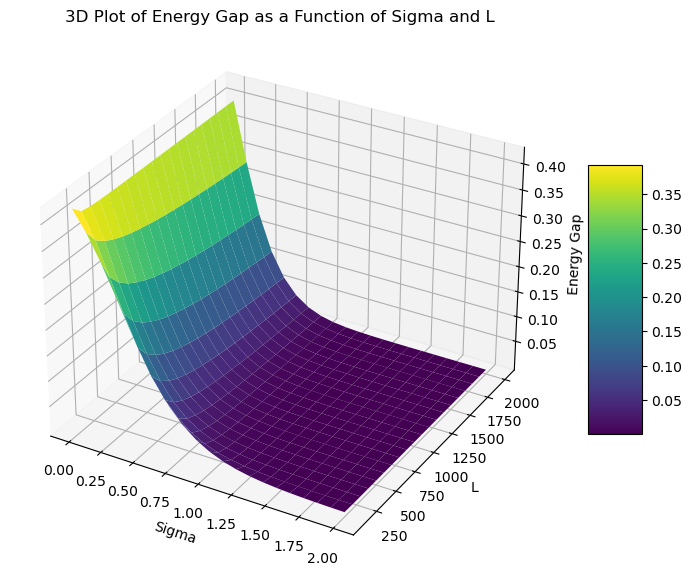

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to create SSH Hamiltonian
def ssh_hamiltonian(L, v, w, sigma):
    SSH = np.zeros((L, L))
    for i in range(L - 1):
        v_i = v * ((i + 1) / (L - 1))**sigma
        w_i = w * ((i + 1) / (L - 1))**sigma
        if i % 2 == 0:
            SSH[i + 1, i] = v_i
            SSH[i, i + 1] = v_i
        else:
            SSH[i + 1, i] = w_i
            SSH[i, i + 1] = w_i
    return SSH

# Function to calculate the energy gap for given parameters
def compute_energy_gap_real_space(L, t, dt, sigma):
    v = t + dt
    w = t - dt
    mid_index = L // 2
    SSH = ssh_hamiltonian(L, v, w, sigma)
    eigenvalues, eigenvectors = np.linalg.eigh(SSH)
    energy_gap = eigenvalues[mid_index + 1] - eigenvalues[mid_index - 2]
    return energy_gap

# Define the ranges for sigma and L
sigma_values = np.arange(0, 2.1, 0.1)   # Sigma from 0 to 2 with interval 0.1
L_values = np.arange(100, 2001, 100)    # L from 100 to 2000 with interval 100
dt = -0.1                               # Constant delta_t
t = 1                                   # Constant t value

# Prepare a 2D array to hold energy gap values for each (sigma, L) pair
Energy_Gap = np.zeros((len(L_values), len(sigma_values)))

# Compute energy gaps by iterating through sigma and L values
for i, L in enumerate(L_values):
    for j, sigma in enumerate(sigma_values):
        Energy_Gap[i, j] = compute_energy_gap_real_space(L, t, dt, sigma)

# Create mesh grids for sigma and L
Sigma, L = np.meshgrid(sigma_values, L_values)

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D surface
surf = ax.plot_surface(Sigma, L, Energy_Gap, cmap='viridis')

# Add color bar for scale reference
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Labeling axes
ax.set_xlabel('Sigma')
ax.set_ylabel('L')
ax.set_zlabel('Energy Gap')
ax.set_title('3D Plot of Energy Gap as a Function of Sigma and L')

plt.show()


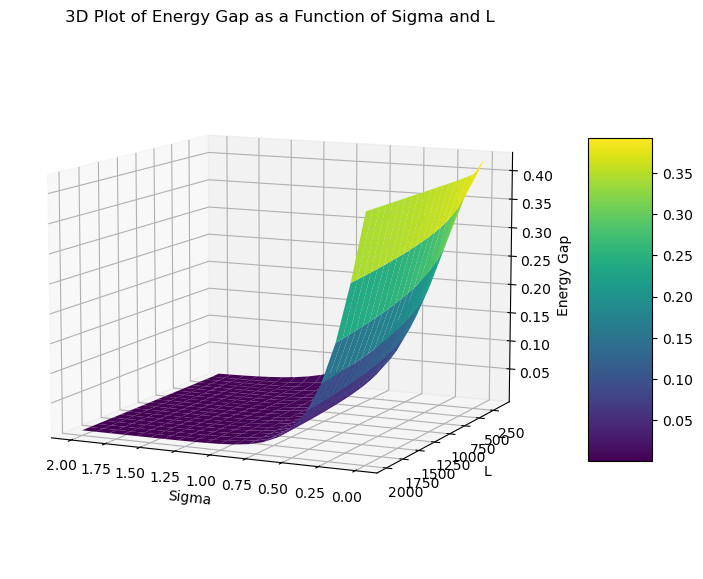

In [37]:
# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D surface
surf = ax.plot_surface(Sigma, L, Energy_Gap, cmap='viridis')

# Add color bar for scale reference
fig.colorbar(surf, ax=ax, shrink=0.6, aspect=5)

# Labeling axes
ax.set_xlabel('Sigma')
ax.set_ylabel('L')
ax.set_zlabel('Energy Gap')
ax.set_title('3D Plot of Energy Gap as a Function of Sigma and L')

# Set the viewing angle
ax.view_init(elev=10, azim=115)  # Change elev and azim to adjust the angle

plt.show()


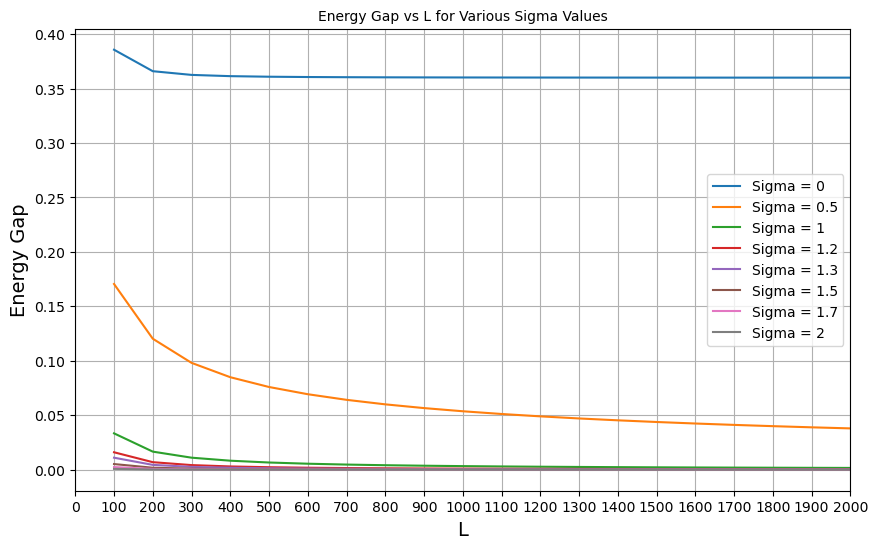

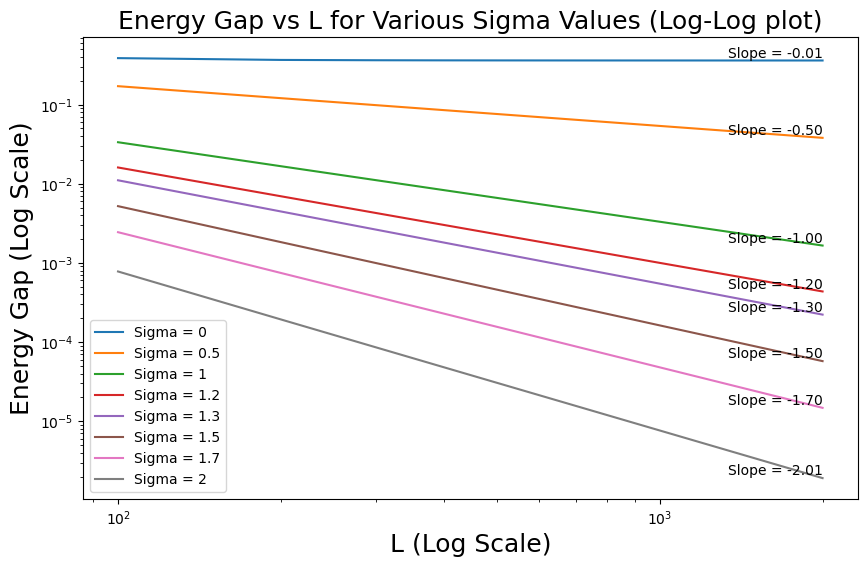

Slopes for each sigma value:
Sigma = 0: Slope = -0.01
Sigma = 0.5: Slope = -0.50
Sigma = 1: Slope = -1.00
Sigma = 1.2: Slope = -1.20
Sigma = 1.3: Slope = -1.30
Sigma = 1.5: Slope = -1.50
Sigma = 1.7: Slope = -1.70
Sigma = 2: Slope = -2.01


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to create SSH Hamiltonian
def ssh_hamiltonian(L, v, w, sigma):
    SSH = np.zeros((L, L))
    for i in range(L - 1):
        v_i = v * ((i + 1) / (L - 1))**sigma
        w_i = w * ((i + 1) / (L - 1))**sigma
        if i % 2 == 0:
            SSH[i + 1, i] = v_i
            SSH[i, i + 1] = v_i
        else:
            SSH[i + 1, i] = w_i
            SSH[i, i + 1] = w_i
    return SSH

# Function to calculate the energy gap for given parameters
def compute_energy_gap_real_space(L, t, dt, sigma):
    v = t + dt
    w = t - dt
    mid_index = L // 2
    SSH = ssh_hamiltonian(L, v, w, sigma)
    eigenvalues, eigenvectors = np.linalg.eigh(SSH)
    energy_gap = eigenvalues[mid_index + 1] - eigenvalues[mid_index - 2]
    return energy_gap

# Define specific sigma values to plot
sigma_values = [ 0,0.5,1, 1.2,1.3, 1.5, 1.7, 2]  # Sigma values for each curve
L_values = np.arange(100, 2001, 100)  # L from 100 to 2000 with interval 100
dt = -0.09  # Constant delta_t
t = 1      # Constant t value

# Plotting
plt.figure(figsize=(10, 6))

# Loop over each sigma value to compute and plot the energy gap vs L
for sigma in sigma_values:
    energy_gaps = [compute_energy_gap_real_space(L, t, dt, sigma) for L in L_values]
    plt.plot(L_values, energy_gaps, label=f'Sigma = {sigma}')  # Plot for each sigma

# Add labels, title, and legend
plt.xlim(0, 2000)
plt.xticks(np.arange(0, 2001, 100))
plt.xlabel('L', fontsize=14)
plt.ylabel('Energy Gap', fontsize=14)
plt.title('Energy Gap vs L for Various Sigma Values', fontsize=10)
plt.legend()
plt.grid(True)
plt.show()

#-------------------------------------------------------------------------------

# # Plotting
# plt.figure(figsize=(10, 6))

# # Loop over each sigma value to compute and plot the energy gap vs L
# for sigma in sigma_values:
#     energy_gaps = [compute_energy_gap_real_space(L, t, dt, sigma) for L in L_values]
#     plt.plot(L_values, energy_gaps, label=f'Sigma = {sigma}')  # Plot for each sigma

# plt.xscale('log')
# plt.yscale('log')
# # plt.xlim(0, 2000)
# # plt.xticks(np.arange(0, 2001, 100))
# plt.xlabel('L (Log Scale)', fontsize=14)
# plt.ylabel('Energy Gap (Log Scale)', fontsize=14)
# plt.title('Energy Gap vs L for Various Sigma Values (Log-Log plot)', fontsize=10)
# plt.legend()
# plt.grid(True)
# plt.show()

#----------------------------------------------------------------------------------------


# Plotting with slope for each line
plt.figure(figsize=(10, 6))

# Dictionary to store slopes for each sigma
slopes = {}

# Loop over each sigma value to compute and plot the energy gap vs L
for sigma in sigma_values:
    energy_gaps = [compute_energy_gap_real_space(L, t, dt, sigma) for L in L_values]
    
    # Calculate the slope in log-log space
    log_L = np.log(L_values)
    log_energy_gaps = np.log(energy_gaps)
    slope, intercept = np.polyfit(log_L, log_energy_gaps, 1)  # Linear fit in log-log space
    slopes[sigma] = slope  # Store the slope for each sigma
    
    # Plot each line
    plt.plot(L_values, energy_gaps, label=f'Sigma = {sigma}')
    
    # Annotate the slope on the graph at the end of each line
    plt.text(L_values[-1], energy_gaps[-1], f"Slope = {slope:.2f}", 
             fontsize=10, verticalalignment='bottom', horizontalalignment='right')

# Set log scale for both axes
plt.xscale('log')
plt.yscale('log')

# Customize axis labels and title
plt.xlabel('L (Log Scale)', fontsize=18)
plt.ylabel('Energy Gap (Log Scale)', fontsize=18)
plt.title('Energy Gap vs L for Various Sigma Values (Log-Log plot)', fontsize=18)

# Add legend and grid for better visualization
plt.legend()
#plt.grid(True)

# Show the plot
plt.show()

# Print the calculated slopes
print("Slopes for each sigma value:")
for sigma, slope in slopes.items():
    print(f"Sigma = {sigma}: Slope = {slope:.2f}")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


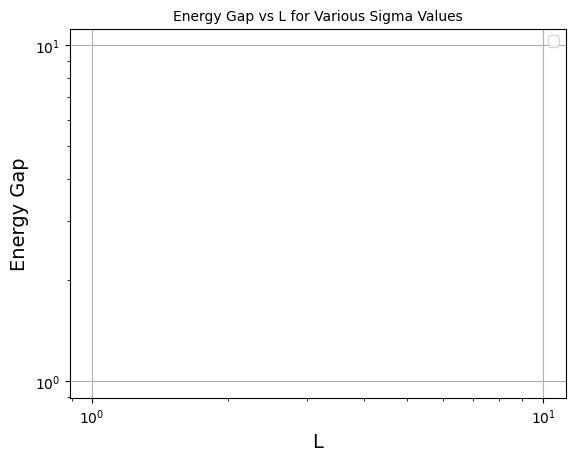

In [25]:
plt.xscale('log')
plt.yscale('log')
# plt.xlim(0, 2000)
# plt.xticks(np.arange(0, 2001, 100))
plt.xlabel('L', fontsize=14)
plt.ylabel('Energy Gap', fontsize=14)
plt.title('Energy Gap vs L for Various Sigma Values', fontsize=10)
plt.legend()
plt.grid(True)
plt.show()

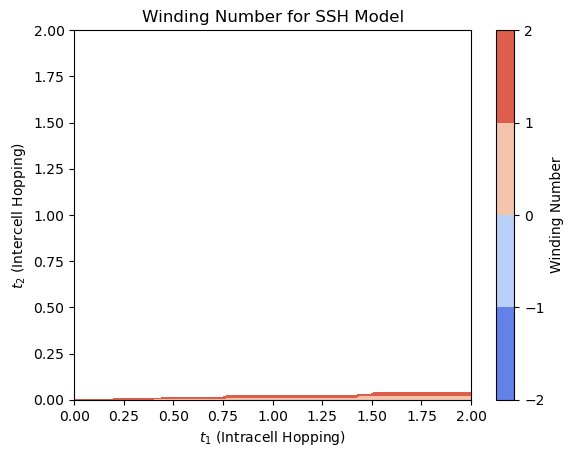

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def ssh_hamiltonian(k, t1, t2):
    """
    Returns the SSH Hamiltonian for given k, t1, and t2.
    Parameters:
        k  : wavevector (float)
        t1 : intracell hopping (float)
        t2 : intercell hopping (float)
    Returns:
        2x2 numpy array representing the Hamiltonian
    """
    h11 = 0
    h12 = t1 + t2 * np.exp(-1j * k)
    return np.array([[h11, h12], [np.conj(h12), h11]])

def winding_number(t1, t2, num_points=1000):
    """
    Calculates the winding number for the SSH model.
    Parameters:
        t1         : intracell hopping (float)
        t2         : intercell hopping (float)
        num_points : number of k-points for integration (int)
    Returns:
        Winding number (float)
    """
    k_vals = np.linspace(-np.pi, np.pi, num_points)
    phi_vals = []

    for k in k_vals:
        h = ssh_hamiltonian(k, t1, t2)
        _, vecs = np.linalg.eigh(h)
        psi = vecs[:, 0]  # Ground state eigenvector
        phi = np.angle(psi[1] + 1j * psi[0])  # Argument of complex number
        phi_vals.append(phi)

    # Compute the difference in phi to detect winding around the origin
    dphi = np.diff(phi_vals)
    winding = np.sum(np.sign(dphi)) / (2 * np.pi)
    return int(round(winding))

def plot_winding(t1_range, t2_range):
    """
    Plots the winding number for different t1 and t2 values.
    Parameters:
        t1_range : range of intracell hopping (list or array)
        t2_range : range of intercell hopping (list or array)
    """
    t1_vals, t2_vals = np.meshgrid(t1_range, t2_range)
    winding_vals = np.zeros_like(t1_vals, dtype=int)

    for i in range(t1_vals.shape[0]):
        for j in range(t1_vals.shape[1]):
            t1 = t1_vals[i, j]
            t2 = t2_vals[i, j]
            winding_vals[i, j] = winding_number(t1, t2)

    plt.contourf(t1_vals, t2_vals, winding_vals, levels=np.arange(-2, 3), cmap='coolwarm')
    plt.colorbar(label="Winding Number")
    plt.xlabel("$t_1$ (Intracell Hopping)")
    plt.ylabel("$t_2$ (Intercell Hopping)")
    plt.title("Winding Number for SSH Model")
    plt.show()

# Example usage:
t1_values = np.linspace(0, 2, 100)
t2_values = np.linspace(0, 2, 100)
plot_winding(t1_values, t2_values)
